In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [3]:
# Assign Url
sheet_id = '1wLXAt2bZEGKIeE_mvg1zYUSAfQCjkrDOREjLKxL55ZE'
sheet_name = 'Employee-Attrition'
url = f"https://docs.google.com/spreadsheets/d/{sheet_id}/gviz/tq?tqx=out:csv&sheet={sheet_name}"

df = pd.read_csv(url)

In [4]:
from Fun import Employee_Attrition
EA = Employee_Attrition()

In [5]:
df = EA.clean(df)

In [6]:
Att_df = EA.selection(df)[0]

In [7]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OrdinalEncoder

In [8]:
order_list = [  ['female', 'male'],
              
                ['single', 'married', 'divorced'],

                ['marketing',
                'medical',
                'life sciences',
                'technical degree',
                'human resources',
                'other'
                ],

                ['sales', 'research & development', 'human resources'],

                ['sales representative',
                'laboratory technician',
                'research scientist',
                'human resources',
                'sales executive',
                'manufacturing director',
                'healthcare representative',
                'research director',
                'manager'],

                ['no', 'yes'],

                ['non-travel','travel_rarely','travel_frequently'],


                ]

In [9]:
cat_col = Att_df.select_dtypes(include=['object']).drop(columns=['attrition'])
cat_col_num = Att_df[['joblevel','performancerating']]
num_col = Att_df.select_dtypes(exclude=['object']).drop(columns=['joblevel','performancerating'])

In [10]:
num_trans = Pipeline(
    steps=[
        ('imputer', SimpleImputer(strategy='median')),
        ('scaler', StandardScaler()),
    ]
)
num_trans

,steps,"[('imputer', ...), ('scaler', ...)]"
,transform_input,None
,memory,None
,verbose,False
,missing_values,nan
,strategy,'median'
,fill_value,None
,copy,True
,add_indicator,False
,keep_empty_features,False
,copy,True


In [11]:
cat_trans = Pipeline(
    steps=[
        ('imputer', SimpleImputer(strategy='most_frequent')),
        ('encoder', OrdinalEncoder(categories=order_list, dtype='int'))
    ]
)
cat_trans

,steps,"[('imputer', ...), ('encoder', ...)]"
,transform_input,None
,memory,None
,verbose,False
,missing_values,nan
,strategy,'most_frequent'
,fill_value,None
,copy,True
,add_indicator,False
,keep_empty_features,False
,categories,"[['female', 'male'], ['single', 'married', ...], ...]"


In [12]:
cat_trans1 = Pipeline(
    steps=[
        ('imputer', SimpleImputer(strategy='most_frequent')),
    ]
)
cat_trans1

,steps,"[('imputer', ...)]"
,transform_input,None
,memory,None
,verbose,False
,missing_values,nan
,strategy,'most_frequent'
,fill_value,None
,copy,True
,add_indicator,False
,keep_empty_features,False


In [13]:
preprocess = ColumnTransformer(
                    transformers=[
                        ('num',num_trans,num_col.columns),
                        ('cat',cat_trans,cat_col.columns),
                        ('cat1',cat_trans1,cat_col_num.columns)
                    ]
                )
preprocess

,transformers,"[('num', ...), ('cat', ...), ...]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True
,force_int_remainder_cols,'deprecated'
,missing_values,nan
,strategy,'median'
,fill_value,None


In [14]:
pipe = Pipeline(
    steps=[
        ('preprocess', preprocess),
    ])
pipe

,steps,"[('preprocess', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('num', ...), ('cat', ...), ...]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [74]:
x = pd.DataFrame(pipe.fit_transform(df),columns=pipe.get_feature_names_out())
x

,num__age,num__numcompaniesworked,num__percentsalaryhike,num__monthlyincome,num__distancefromhome,cat__gender,cat__maritalstatus,cat__educationfield,cat__department,cat__jobrole,cat__overtime,cat__businesstravel,cat1__joblevel,cat1__performancerating
0,0.446350,2.125136,-1.150554,-0.108350,-1.010909,0.0,0.0,2.0,0.0,4.0,1.0,1.0,2.0,3.0
1,1.322365,-0.678049,2.129306,-0.291719,-0.147150,1.0,1.0,2.0,1.0,2.0,0.0,2.0,2.0,4.0
2,0.008343,1.324226,-0.057267,-0.937654,-0.887515,1.0,0.0,5.0,1.0,1.0,1.0,1.0,1.0,3.0
3,-0.429664,-0.678049,-1.150554,-0.763634,-0.764121,0.0,1.0,2.0,1.0,2.0,1.0,2.0,1.0,3.0
4,-1.086676,2.525591,-0.877232,-0.644858,-0.887515,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,-0.101159,0.523316,0.489376,-0.835451,1.703764,1.0,1.0,1.0,1.0,1.0,0.0,2.0,2.0,3.0
1466,0.227347,0.523316,-0.057267,0.741140,-0.393938,1.0,1.0,1.0,1.0,6.0,0.0,1.0,3.0,3.0
1467,-1.086676,-0.678049,1.309341,-0.076690,-0.640727,1.0,1.0,2.0,1.0,5.0,1.0,1.0,2.0,4.0
1468,1.322365,-0.277594,-0.330589,-0.236474,-0.887515,1.0,1.0,1.0,0.0,4.0,0.0,2.0,2.0,3.0


In [75]:
y = df['attrition'].apply(lambda x : 1 if x == 'yes' else 0 ).reset_index(drop=True)
y

0       1
1       0
2       1
3       0
4       0
       ..
1465    0
1466    0
1467    0
1468    0
1469    0
Name: attrition, Length: 1470, dtype: int64

In [94]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=42)

In [95]:
from sklearn.linear_model import LogisticRegression
LGR = LogisticRegression(penalty='l1',solver='liblinear',C=1.0,random_state=42)
LGR.fit(x_train, y_train)

,penalty,'l1'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,42
,solver,'liblinear'
,max_iter,100
,multi_class,'deprecated'


In [96]:
y_train_pread = LGR.predict(x_train)
y_test_pread = LGR.predict(x_test)

------------------------- Train Data Matrix Report -------------------------
              precision    recall  f1-score   support

           0       0.87      0.97      0.92       913
           1       0.65      0.31      0.42       189

    accuracy                           0.85      1102
   macro avg       0.76      0.64      0.67      1102
weighted avg       0.83      0.85      0.83      1102

---------------------------------------------------------------------------
------------------------- Test Data Matrix Report -------------------------
              precision    recall  f1-score   support

           0       0.89      0.96      0.92       320
           1       0.43      0.21      0.28        48

    accuracy                           0.86       368
   macro avg       0.66      0.58      0.60       368
weighted avg       0.83      0.86      0.84       368

---------------------------------------------------------------------------


Text(0.5, 1.0, 'Test Data Confusion Matrix')

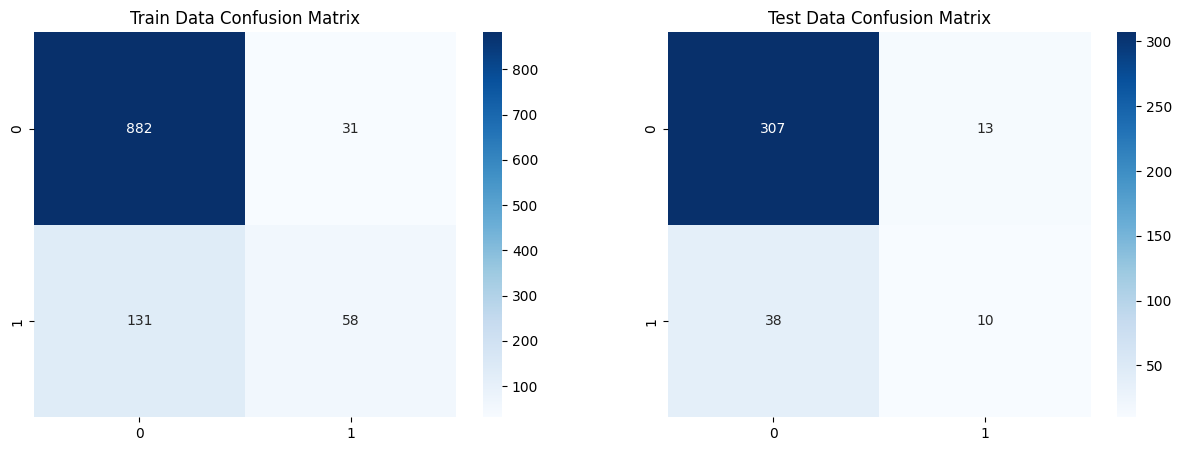

In [97]:
from sklearn.metrics import classification_report, confusion_matrix

print(25*"-","Train Data Matrix Report",25*"-")

print(classification_report(y_train, y_train_pread))
print(75*"-")
print(25*"-","Test Data Matrix Report",25*"-")
print(classification_report(y_test, y_test_pread))
print(75*"-")

fig, ax = plt.subplots(1, 2, figsize=(15, 5))

sns.heatmap(confusion_matrix(y_train, y_train_pread),annot=True, fmt='d', cmap='Blues',ax=ax[0])
ax[0].set_title('Train Data Confusion Matrix')

sns.heatmap(confusion_matrix(y_test, y_test_pread),annot=True, fmt='d', cmap='Blues',ax=ax[1])
ax[1].set_title('Test Data Confusion Matrix')

## My sample data is imbalance

In [83]:
# Using Imsampler to balance the dataset by RandomOverSampler

from imblearn.over_sampling import RandomOverSampler
from collections import Counter
print('Original Dataset y value : ',Counter(y))
ros = RandomOverSampler()
x_resampled, y_resampled = ros.fit_resample(x, y)
print('Resampled Dataset y value : ',Counter(y_resampled))

Original Dataset y value :  Counter({0: 1233, 1: 237})
Resampled Dataset y value :  Counter({1: 1233, 0: 1233})


------------------------- Train Data Matrix Report -------------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       922
           1       1.00      1.00      1.00       927

    accuracy                           1.00      1849
   macro avg       1.00      1.00      1.00      1849
weighted avg       1.00      1.00      1.00      1849

---------------------------------------------------------------------------
------------------------- Test Data Matrix Report -------------------------
              precision    recall  f1-score   support

           0       1.00      0.94      0.97       311
           1       0.94      1.00      0.97       306

    accuracy                           0.97       617
   macro avg       0.97      0.97      0.97       617
weighted avg       0.97      0.97      0.97       617

---------------------------------------------------------------------------


Text(0.5, 1.0, 'Test Data Confusion Matrix')

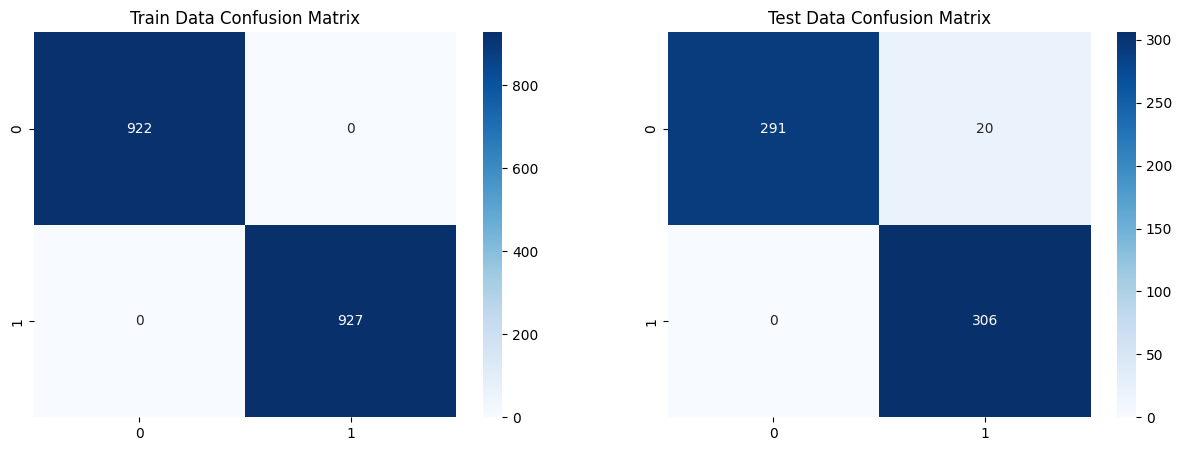

In [84]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x_resampled,y_resampled,test_size=0.25,random_state=42)
from sklearn.ensemble import RandomForestClassifier
RFC = RandomForestClassifier()
RFC.fit(x_train, y_train)
y_train_pread = RFC.predict(x_train)
y_test_pread = RFC.predict(x_test)
'''
from sklearn.linear_model import LogisticRegression
LGR = LogisticRegression()
LGR.fit(x_train, y_train)
y_train_pread = LGR.predict(x_train)
y_test_pread = LGR.predict(x_test)
'''
from sklearn.metrics import classification_report, confusion_matrix

print(25*"-","Train Data Matrix Report",25*"-")

print(classification_report(y_train, y_train_pread))
print(75*"-")
print(25*"-","Test Data Matrix Report",25*"-")
print(classification_report(y_test, y_test_pread))
print(75*"-")

fig, ax = plt.subplots(1, 2, figsize=(15, 5))

sns.heatmap(confusion_matrix(y_train, y_train_pread),annot=True, fmt='d', cmap='Blues',ax=ax[0])
ax[0].set_title('Train Data Confusion Matrix')

sns.heatmap(confusion_matrix(y_test, y_test_pread),annot=True, fmt='d', cmap='Blues',ax=ax[1])
ax[1].set_title('Test Data Confusion Matrix')

In [85]:
# Implementing smote due to accuracy poor in randomoversampler

from imblearn.over_sampling import SMOTE
from collections import Counter
print('Original Dataset y value : ',Counter(y))
smote = SMOTE(random_state=42)
x_resampled, y_resampled = smote.fit_resample(x, y)
print('Resampled Dataset y value : ',Counter(y_resampled))

Original Dataset y value :  Counter({0: 1233, 1: 237})
Resampled Dataset y value :  Counter({1: 1233, 0: 1233})


------------------------- Train Data Matrix Report -------------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       983
           1       1.00      1.00      1.00       989

    accuracy                           1.00      1972
   macro avg       1.00      1.00      1.00      1972
weighted avg       1.00      1.00      1.00      1972

---------------------------------------------------------------------------
------------------------- Test Data Matrix Report -------------------------
              precision    recall  f1-score   support

           0       0.92      0.94      0.93       250
           1       0.94      0.91      0.93       244

    accuracy                           0.93       494
   macro avg       0.93      0.93      0.93       494
weighted avg       0.93      0.93      0.93       494

---------------------------------------------------------------------------


Text(0.5, 1.0, 'Test Data Confusion Matrix')

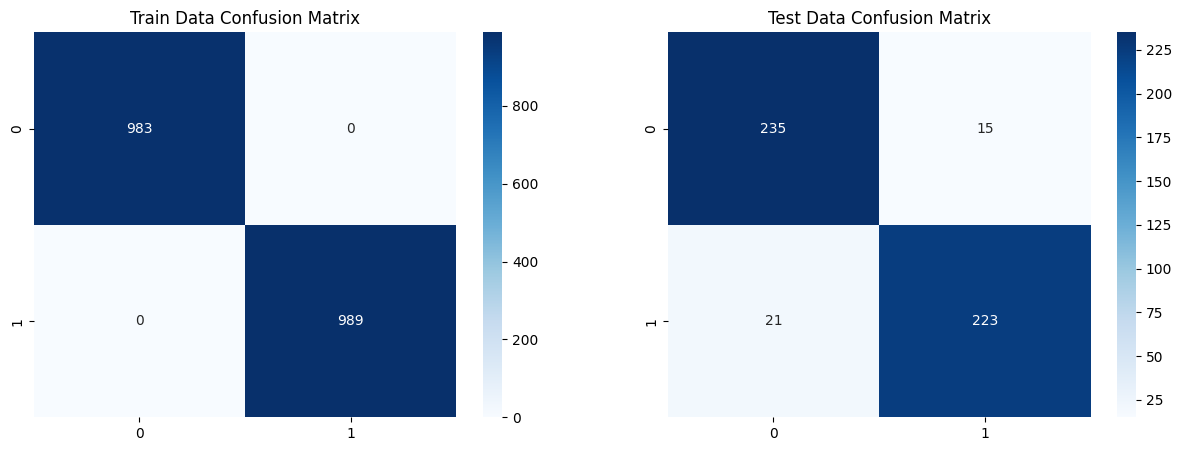

In [86]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x_resampled,y_resampled,test_size=0.2,random_state=42)
from sklearn.ensemble import RandomForestClassifier
RFC = RandomForestClassifier()
RFC.fit(x_train, y_train)
y_train_pread = RFC.predict(x_train)
y_test_pread = RFC.predict(x_test)
'''
from sklearn.linear_model import LogisticRegression
LGR = LogisticRegression()
LGR.fit(x_train, y_train)
y_train_pread = LGR.predict(x_train)
y_test_pread = LGR.predict(x_test)
'''

from sklearn.metrics import classification_report, confusion_matrix

print(25*"-","Train Data Matrix Report",25*"-")

print(classification_report(y_train, y_train_pread))
print(75*"-")
print(25*"-","Test Data Matrix Report",25*"-")
print(classification_report(y_test, y_test_pread))
print(75*"-")

fig, ax = plt.subplots(1, 2, figsize=(15, 5))

sns.heatmap(confusion_matrix(y_train, y_train_pread),annot=True, fmt='d', cmap='Blues',ax=ax[0])
ax[0].set_title('Train Data Confusion Matrix')

sns.heatmap(confusion_matrix(y_test, y_test_pread),annot=True, fmt='d', cmap='Blues',ax=ax[1])
ax[1].set_title('Test Data Confusion Matrix')

In [88]:
# Implementing Borderline smoot

from imblearn.over_sampling import BorderlineSMOTE
from collections import Counter
print('Original Dataset y value : ',Counter(y))
B_smote = BorderlineSMOTE(random_state=42)
x_resampled, y_resampled = B_smote.fit_resample(x, y)
print('Resampled Dataset y value : ',Counter(y_resampled))

Original Dataset y value :  Counter({0: 1233, 1: 237})
Resampled Dataset y value :  Counter({1: 1233, 0: 1233})


------------------------- Train Data Matrix Report -------------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       983
           1       1.00      1.00      1.00       989

    accuracy                           1.00      1972
   macro avg       1.00      1.00      1.00      1972
weighted avg       1.00      1.00      1.00      1972

---------------------------------------------------------------------------
------------------------- Test Data Matrix Report -------------------------
              precision    recall  f1-score   support

           0       0.93      0.94      0.93       250
           1       0.94      0.92      0.93       244

    accuracy                           0.93       494
   macro avg       0.93      0.93      0.93       494
weighted avg       0.93      0.93      0.93       494

---------------------------------------------------------------------------


Text(0.5, 1.0, 'Test Data Confusion Matrix')

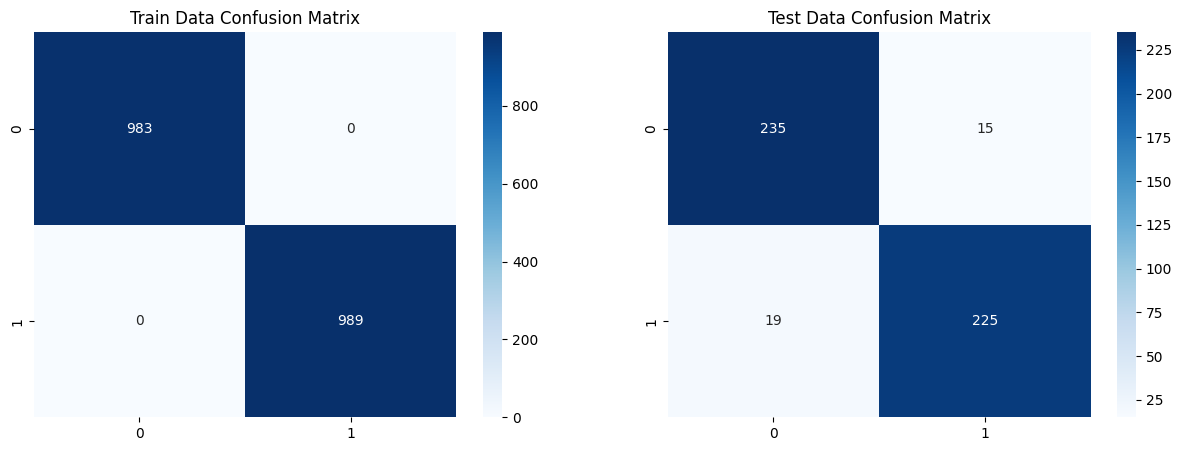

In [89]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x_resampled,y_resampled,test_size=0.2,random_state=42)

from sklearn.ensemble import RandomForestClassifier
RFC = RandomForestClassifier()
RFC.fit(x_train, y_train)
y_train_pread = RFC.predict(x_train)
y_test_pread = RFC.predict(x_test)

'''
from sklearn.linear_model import LogisticRegression
LGR = LogisticRegression()
LGR.fit(x_train, y_train)
y_train_pread = LGR.predict(x_train)
y_test_pread = LGR.predict(x_test)
'''

from sklearn.metrics import classification_report, confusion_matrix

print(25*"-","Train Data Matrix Report",25*"-")

print(classification_report(y_train, y_train_pread))
print(75*"-")
print(25*"-","Test Data Matrix Report",25*"-")
print(classification_report(y_test, y_test_pread))
print(75*"-")

fig, ax = plt.subplots(1, 2, figsize=(15, 5))

sns.heatmap(confusion_matrix(y_train, y_train_pread),annot=True, fmt='d', cmap='Blues',ax=ax[0])
ax[0].set_title('Train Data Confusion Matrix')

sns.heatmap(confusion_matrix(y_test, y_test_pread),annot=True, fmt='d', cmap='Blues',ax=ax[1])
ax[1].set_title('Test Data Confusion Matrix')

In [90]:
# Implementing Adaptive Synthetic Sampling

from imblearn.over_sampling import ADASYN
from collections import Counter
print('Original Dataset y value : ',Counter(y))
ADA = ADASYN(random_state=42)
x_resampled, y_resampled = ADA.fit_resample(x, y)
print('Resampled Dataset y value : ',Counter(y_resampled))

Original Dataset y value :  Counter({0: 1233, 1: 237})
Resampled Dataset y value :  Counter({0: 1233, 1: 1202})


------------------------- Train Data Matrix Report -------------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       986
           1       1.00      1.00      1.00       962

    accuracy                           1.00      1948
   macro avg       1.00      1.00      1.00      1948
weighted avg       1.00      1.00      1.00      1948

---------------------------------------------------------------------------
------------------------- Test Data Matrix Report -------------------------
              precision    recall  f1-score   support

           0       0.90      0.94      0.92       247
           1       0.94      0.89      0.91       240

    accuracy                           0.92       487
   macro avg       0.92      0.92      0.92       487
weighted avg       0.92      0.92      0.92       487

---------------------------------------------------------------------------


Text(0.5, 1.0, 'Test Data Confusion Matrix')

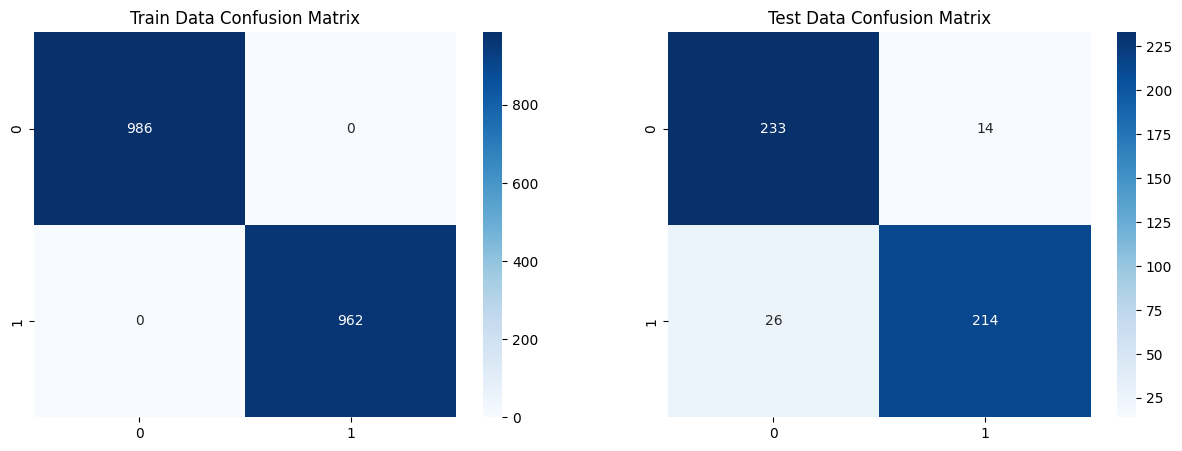

In [91]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x_resampled,y_resampled,test_size=0.2,random_state=42)

from sklearn.ensemble import RandomForestClassifier
RFC = RandomForestClassifier()
RFC.fit(x_train, y_train)
y_train_pread = RFC.predict(x_train)
y_test_pread = RFC.predict(x_test)

'''
from sklearn.linear_model import LogisticRegression
LGR = LogisticRegression()
LGR.fit(x_train, y_train)
y_train_pread = LGR.predict(x_train)
y_test_pread = LGR.predict(x_test)
'''

from sklearn.metrics import classification_report, confusion_matrix

print(25*"-","Train Data Matrix Report",25*"-")

print(classification_report(y_train, y_train_pread))
print(75*"-")
print(25*"-","Test Data Matrix Report",25*"-")
print(classification_report(y_test, y_test_pread))
print(75*"-")

fig, ax = plt.subplots(1, 2, figsize=(15, 5))

sns.heatmap(confusion_matrix(y_train, y_train_pread),annot=True, fmt='d', cmap='Blues',ax=ax[0])
ax[0].set_title('Train Data Confusion Matrix')

sns.heatmap(confusion_matrix(y_test, y_test_pread),annot=True, fmt='d', cmap='Blues',ax=ax[1])
ax[1].set_title('Test Data Confusion Matrix')

In [92]:
from imblearn.ensemble import BalancedBaggingClassifier
from collections import Counter
print('Original Dataset y value : ',Counter(y))

from sklearn.ensemble import RandomForestClassifier
RFC = RandomForestClassifier()

BBC = BalancedBaggingClassifier(
        RFC,
        sampling_strategy='auto',
        replacement=False,
        random_state=42
        )


Original Dataset y value :  Counter({0: 1233, 1: 237})


------------------------- Train Data Matrix Report -------------------------
              precision    recall  f1-score   support

           0       0.99      0.90      0.94       978
           1       0.65      0.96      0.78       198

    accuracy                           0.91      1176
   macro avg       0.82      0.93      0.86      1176
weighted avg       0.94      0.91      0.91      1176

---------------------------------------------------------------------------
------------------------- Test Data Matrix Report -------------------------
              precision    recall  f1-score   support

           0       0.91      0.87      0.89       255
           1       0.33      0.44      0.38        39

    accuracy                           0.81       294
   macro avg       0.62      0.65      0.63       294
weighted avg       0.83      0.81      0.82       294

---------------------------------------------------------------------------


Text(0.5, 1.0, 'Test Data Confusion Matrix')

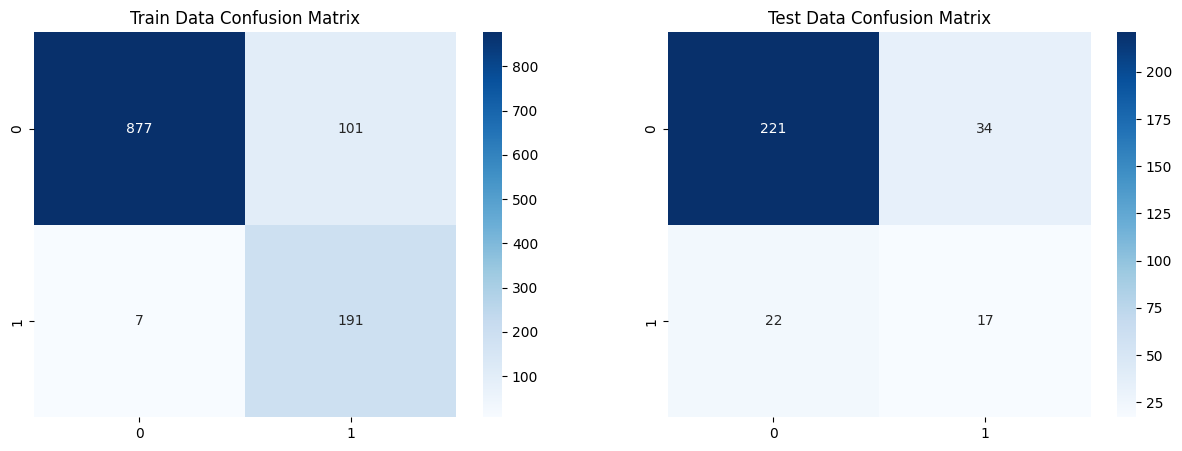

In [93]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

BBC.fit(x_train, y_train)
y_train_pread = BBC.predict(x_train)
y_test_pread = BBC.predict(x_test)

from sklearn.metrics import classification_report, confusion_matrix

print(25*"-","Train Data Matrix Report",25*"-")

print(classification_report(y_train, y_train_pread))
print(75*"-")
print(25*"-","Test Data Matrix Report",25*"-")
print(classification_report(y_test, y_test_pread))
print(75*"-")

fig, ax = plt.subplots(1, 2, figsize=(15, 5))

sns.heatmap(confusion_matrix(y_train, y_train_pread),annot=True, fmt='d', cmap='Blues',ax=ax[0])
ax[0].set_title('Train Data Confusion Matrix')

sns.heatmap(confusion_matrix(y_test, y_test_pread),annot=True, fmt='d', cmap='Blues',ax=ax[1])
ax[1].set_title('Test Data Confusion Matrix')

------------------------- Train Data Matrix Report -------------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       913
           1       1.00      1.00      1.00       189

    accuracy                           1.00      1102
   macro avg       1.00      1.00      1.00      1102
weighted avg       1.00      1.00      1.00      1102

---------------------------------------------------------------------------
------------------------- Test Data Matrix Report -------------------------
              precision    recall  f1-score   support

           0       0.88      0.98      0.93       320
           1       0.50      0.10      0.17        48

    accuracy                           0.87       368
   macro avg       0.69      0.54      0.55       368
weighted avg       0.83      0.87      0.83       368

---------------------------------------------------------------------------


Text(0.5, 1.0, 'Test Data Confusion Matrix')

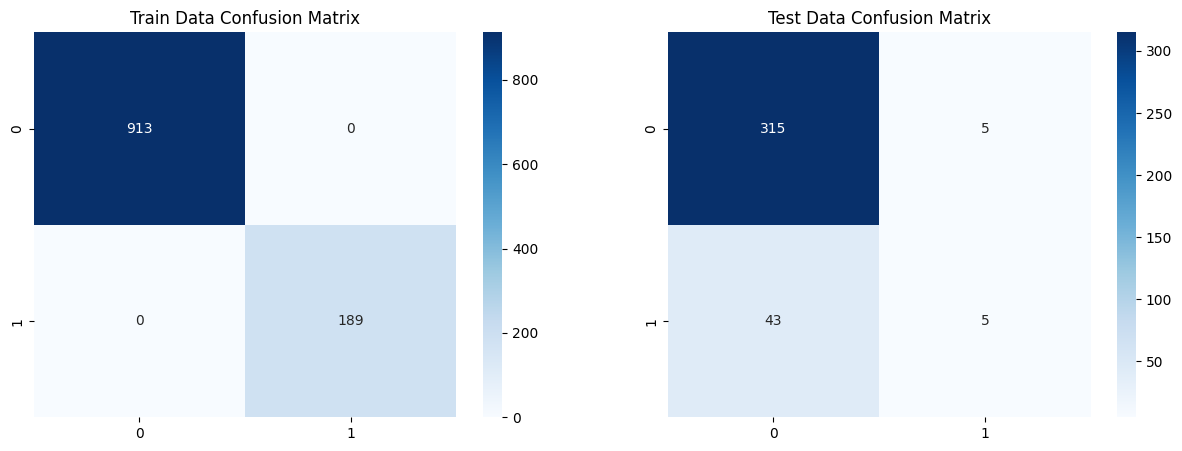

In [81]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 42)

from sklearn.ensemble import RandomForestClassifier
RFC = RandomForestClassifier()
RFC.fit(x_train, y_train)

y_train_pread = RFC.predict(x_train)
y_test_pread = RFC.predict(x_test)

from sklearn.metrics import classification_report, confusion_matrix

print(25*"-","Train Data Matrix Report",25*"-")

print(classification_report(y_train, y_train_pread))
print(75*"-")
print(25*"-","Test Data Matrix Report",25*"-")
print(classification_report(y_test, y_test_pread))
print(75*"-")

fig, ax = plt.subplots(1, 2, figsize=(15, 5))

sns.heatmap(confusion_matrix(y_train, y_train_pread),annot=True, fmt='d', cmap='Blues',ax=ax[0])
ax[0].set_title('Train Data Confusion Matrix')

sns.heatmap(confusion_matrix(y_test, y_test_pread),annot=True, fmt='d', cmap='Blues',ax=ax[1])
ax[1].set_title('Test Data Confusion Matrix')

